In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [422]:
df = pd.read_csv("data.csv")

In [423]:
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


### Análise inicial e limpeza de dados (remoção de colunas e de outliers)

In [424]:
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

In [425]:
df.head()

,area,bedrooms,garage,type,rent,total
0,21,1,0,Studio e kitnet,2400,2939
1,15,1,1,Studio e kitnet,1030,1345
2,18,1,0,Apartamento,4000,4661
3,56,2,2,Casa em condomínio,1750,1954
4,19,1,0,Studio e kitnet,4000,4654


In [427]:
df['rent'].describe()

count    11657.000000
mean      3250.814789
std       2650.711557
min        500.000000
25%       1590.000000
50%       2415.000000
75%       3800.000000
max      25000.000000
Name: rent, dtype: float64

In [428]:
filtro = df['type'] == '?'
valores_nulos = df.loc[filtro]
valores_nulos

,area,bedrooms,garage,type,rent,total


In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   area      11657 non-null  int64 
 1   bedrooms  11657 non-null  int64 
 2   garage    11657 non-null  int64 
 3   type      11657 non-null  object
 4   rent      11657 non-null  int64 
 5   total     11657 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 546.6+ KB


In [430]:
df.sort_values(by='rent', ascending=False)


,area,bedrooms,garage,type,rent,total
6095,24,1,0,Studio e kitnet,25000,26710
9720,200,3,4,Apartamento,15000,19160
11546,340,4,6,Casa em condomínio,15000,17190
10358,260,4,2,Casa,15000,15900
8767,328,4,4,Apartamento,15000,22750
...,...,...,...,...,...,...
6428,30,1,0,Studio e kitnet,500,594
7420,20,1,0,Casa,500,521
1188,30,1,0,Casa,500,521
51,45,1,0,Casa,500,551


In [440]:
df = df[df['rent'] != 25000]

In [432]:
df = pd.get_dummies(df, columns=['type'], drop_first=True,  dtype='int')
df.head()

,area,bedrooms,garage,rent,total,type_Casa,type_Casa em condomínio,type_Studio e kitnet
0,21,1,0,2400,2939,0,0,1
1,15,1,1,1030,1345,0,0,1
2,18,1,0,4000,4661,0,0,0
3,56,2,2,1750,1954,0,1,0
4,19,1,0,4000,4654,0,0,1


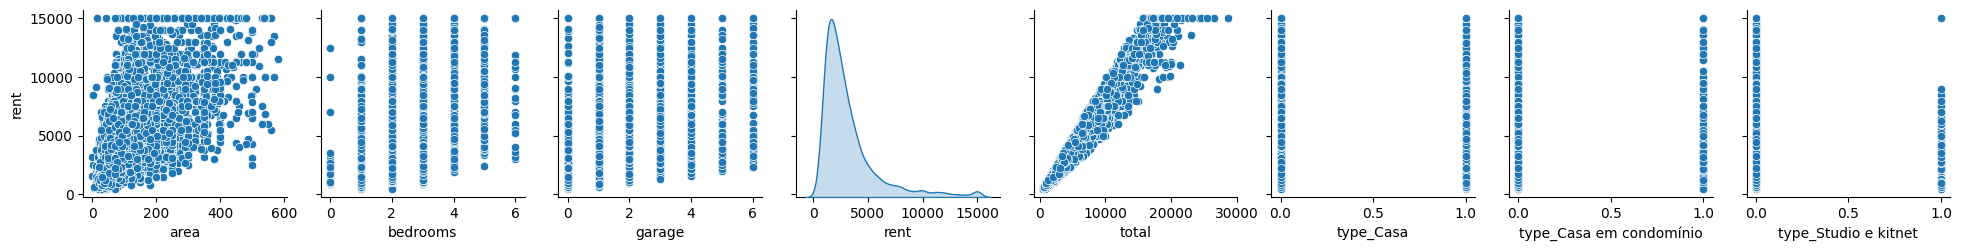

In [433]:
sns.pairplot(df, diag_kind='kde', y_vars=['rent'])

### Trabalhando com um modelo de Regressão Linear simples

In [434]:
X = df.drop(['rent'], axis=1)
y = df['rent']

In [435]:
X = sm.add_constant(X)

In [436]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [447]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

### Visualização dos dados e da linha de regressão

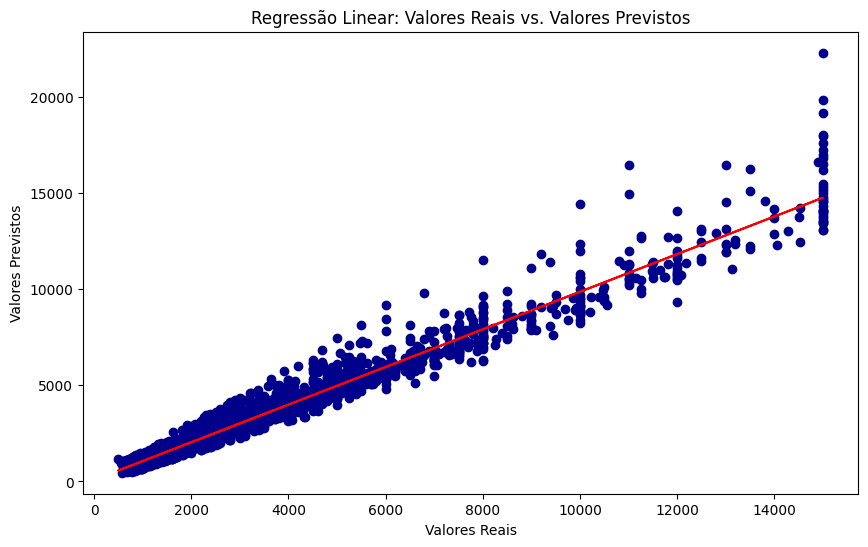

In [445]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='darkblue')  # Scatter plot dos valores reais vs. previstos
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Regressão Linear: Valores Reais vs. Valores Previstos')

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='r')  # Linha de regressão

plt.show()

### Avaliação do modelo (R-Squared, MAE e MAPE)

In [462]:
r2 = r2_score(y_test, y_pred)*100
print(f'R-Quadrado (R2): {r2:.2f}%')


R-Quadrado (R2): 96.25%


In [457]:
mae = mean_absolute_error(y_test,y_pred)
print(f'Erro Médio Absoluto (MAE): R${mae:.2f}')

Erro Médio Absoluto (MAE): R$307.49


In [460]:
mape = mean_absolute_percentage_error(y_test, y_pred)*100
print(f'Erro Percentual Absoluto Médio (MAPE): {mape:.2f}%')

Erro Percentual Absoluto Médio (MAPE): 11.73%
